In [2]:
import nltk 

In [3]:
nltk.download('book', quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt') # 리스트 형식으로 들어옴
emma_raw[:1000]

"[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice of 

# 토큰 생성
- 자연어 문서에서 분석을 위새 긴 문자열을 작은 단위로 나누는 것
- 문장 단위, 단어 단위, 정규표현식으로 나눌 수 있음

In [5]:
# 문장 단위 토큰
from nltk.tokenize import sent_tokenize
# 문장 단위로 나누고 세번째 토큰을 호출
print(sent_tokenize(emma_raw[:1000])[:3])

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.', "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.", 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.']


In [6]:
# 단어 단위 토큰 : 컴퓨터는 띄워쓰기를 기준으로 단어로 구분을 한다.
from nltk.tokenize import word_tokenize
print(word_tokenize(emma_raw[10:100]))

['ane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']


In [7]:
# 정규 표현식으로 토큰 생성
# 정규표현식으로 토큰을 나누면 쓸모없는 단어가 사라진다.
from nltk.tokenize import RegexpTokenizer
# [1/9] : 1~9중 하나 / \w : 단어를 자르는데 문자만 분리 : '+' <- 선택된것이 한자 이상을 의미
# [\w]+ : 문자 한자 이상인 단어(w)를 나눈다.
retToken = RegexpTokenizer("[\w]+")
retToken.tokenize(emma_raw[10:100])

['ane',
 'Austen',
 '1816',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a']

# 형태소 분석
- 형태소 : 언어학에서 일정한 의미가 있는 가장 작은 말의 단위
- 보통 자연어 처리에서 토큰으로 형태소를 이용
- 형태소 분석 : 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 처리하는 작업
- 형태소 분석의 예
  - 어간 추출
  - 원형 복원
  - 품사 부착

# 어간 추출
- PorterStemmer, lancasterStemmer제공


In [8]:
# 형태소 분석
from nltk.stem import PorterStemmer, LancasterStemmer


In [9]:
st1 = PorterStemmer()
st2 = LancasterStemmer()

In [10]:
# stem : 의미를 제거하고 어간을 추출
# 어간 추출 : 단어의 의미를 잘라준다.
words = ['fly', 'flies', 'flying', 'flew', 'flown']
print("PorterStemmer : ", [st1.stem(w) for w in words])
print("LacasterStemmer : ", [st2.stem(w) for w in words]) # 컴프리핸션 - 리스트

PorterStemmer :  ['fli', 'fli', 'fli', 'flew', 'flown']
LacasterStemmer :  ['fly', 'fli', 'fly', 'flew', 'flown']


In [11]:
# 컴프리핸션 설명
list1= []
for i in range(10) :
    list1.append(i + 100)

print(list1)

# 위와 같은 방식을 아래와 같이 표현하는 방식 : 컴프릴핸션
list2 = [i+100 for i in range(10)]
print(list2)

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
[100, 101, 102, 103, 104, 105, 106, 107, 108, 109]


# 원형복원
- 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업

In [12]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4') # 원형 복원은 버전까지 다운로드 해야 한다.

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yang\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
lm = WordNetLemmatizer()
[lm.lemmatize(w, 'v') for w in words]

list2 = []
for w in words :
    list2.append(lm.lemmatize(w, 'v'))
print(list2)

['fly', 'fly', 'fly', 'fly', 'fly']


# 품사 부착 (pos tag)
- 품사는 날말을 문법적인 기능이나 형태, 뜻에 따라 구분한 것
- 품사의 예
  - NNP : 단순고유명사
  - VB : 동사
  - VBP : 동사현재형
  - NN : 명사
  - DT : 관형사

In [14]:
from nltk.tag import pos_tag
sentence = 'Emma refused to permit us to botain the refuse permit'
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('botain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [15]:
# 품사에 대한 설명글 
nltk.help.upenn_tagset('NNP')
nltk.help.upenn_tagset('DT')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


In [16]:
tagged_list = pos_tag(word_tokenize(sentence)) # 요소 하나는 튜플로 됨
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('botain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [17]:
# 태그 중에 명사만 추출
moun_list=[t[0] for t in tagged_list if t[1]=='NN']
moun_list

moun_list2 = []
for t in tagged_list :
    if t[1] == 'NN' :
        moun_list.append(t[0])
moun_list

['refuse', 'permit', 'refuse', 'permit']

In [18]:
# 컴프리헨션
# for문 안에 else문이 있는 if문일 경우는 위의 경우를 else가 들어갈때는 앞에 들어간다
moun_list3 = [t[0] if t[1] == 'VB' else '-' for t in tagged_list] 
print(moun_list3)

moun_list4 = []
for t in tagged_list :
    if t[1] == 'VB' :
        moun_list4.append(t[0])
    else :
        moun_list4.append('-')

moun_list4

['-', '-', '-', 'permit', '-', '-', 'botain', '-', '-', '-']


['-', '-', '-', 'permit', '-', '-', 'botain', '-', '-', '-']

In [19]:
from nltk.tag import untag # untag : 태그를 벗긴다.
untag_list = untag(tagged_list)
untag_list

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'botain',
 'the',
 'refuse',
 'permit']

- 단어가 아닌것을 제외하고 싶을 경우 : 정규 표현식으로 바꾼다.

# Text 클래스 
- 문서 분석을 위한 클래스

In [20]:
from nltk import Text

text = Text(retToken.tokenize(emma_raw)) # retToken : 정규포현식으로 토큰을 나누어준것
print(text)

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>


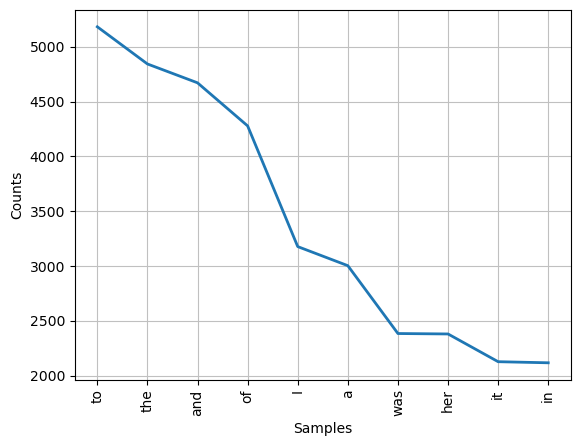

<Axes: xlabel='Samples', ylabel='Counts'>

In [51]:
import matplotlib.pyplot as plt
text.plot(10) # 빈도수 높은 것 10개만 쪼개서 그려준다. --- !!!!!다시 확인하기
# plt.show()

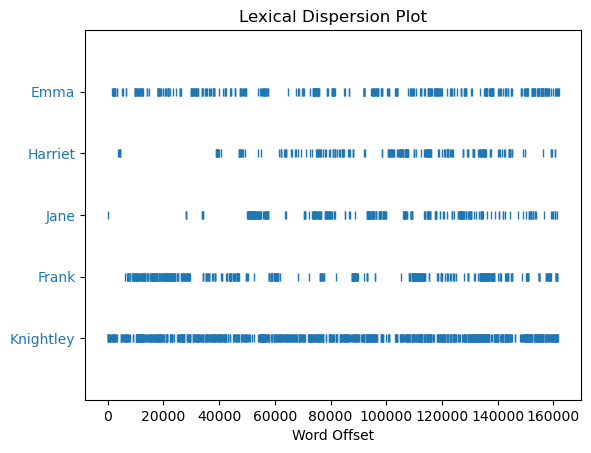

In [36]:
text.dispersion_plot(['Knightley', 'Frank', 'Jane', 'Harriet', 'Emma'])

In [23]:
text.concordance('Emma')

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [24]:
text.similar('Emma') # 'Emma'랑 같은 뜻

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [25]:
text.common_contexts('Emma', 'her')

No common contexts were found


# FreqDist
- 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스
- vocab() 메소드로 추출

In [26]:
# 단어별 빈도수
fd = text.vocab()
fd

FreqDist({'to': 5183, 'the': 4844, 'and': 4672, 'of': 4279, 'I': 3178, 'a': 3004, 'was': 2385, 'her': 2381, 'it': 2128, 'in': 2118, ...})

In [53]:
from nltk import FreqDist
# 고유명사는 단어의 첫글자가 대문자일 경우 대문자로 인식
stopword = ['Mr.', 'Mrs.', 'Miss', 'Mr', 'Mrs', 'Dear', 'A', 'No', 'Ah', 'Oh']
emma_token = pos_tag(retToken.tokenize(emma_raw))
# name_list = [t[0] for t in emma_token if t[1] == 'NNP' and t[0] not in stopword]
# 컴퓨터가 고유명사를 찾는 방법 : 첫자가 대문자인 단어
name_list = [t[0] for t in emma_token if t[1] == 'NNP' and t[0] not in stopword]
name_list

['Jane',
 'Austen',
 'VOLUME',
 'Emma',
 'Woodhouse',
 'Sixteen',
 'Taylor',
 'Woodhouse',
 'Emma',
 'Between',
 'Taylor',
 'Emma',
 'Taylor',
 'Emma',
 'Sorrow',
 'Taylor',
 'Taylor',
 'Emma',
 'Weston',
 'Taylor',
 'Isabella',
 'How',
 'Emma',
 'Weston',
 'Taylor',
 'Woodhouse',
 'Her',
 'London',
 'October',
 'November',
 'Hartfield',
 'Christmas',
 'Isabella',
 'Highbury',
 'Hartfield',
 'Taylor',
 'Emma',
 'Matrimony',
 'Taylor',
 'Taylor',
 'Hartfield',
 'Emma',
 'Poor',
 'Taylor',
 'Weston',
 'Weston',
 'Taylor',
 'How',
 'Randalls',
 'James',
 'Weston',
 'Weston',
 'James',
 'Randalls',
 'Hannah',
 'Nobody',
 'Hannah',
 'James',
 'James',
 'Whenever',
 'Taylor',
 'Whenever',
 'James',
 'Emma',
 'Knightley',
 'Isabella',
 'Highbury',
 'London',
 'Hartfield',
 'Brunswick',
 'Square',
 'Woodhouse',
 'Knightley',
 'Isabella',
 'Woodhouse',
 'Knightley',
 'Dirty',
 'Look',
 'Well',
 'Who',
 'Taylor',
 'Tis',
 'Poor',
 'Woodhouse',
 'Taylor',
 'Emma',
 'Emma',
 'Woodhouse',
 'My',
 '

In [54]:
fd_name = FreqDist(name_list)
fd_name

FreqDist({'Emma': 830, 'Harriet': 491, 'Weston': 439, 'Knightley': 389, 'Elton': 385, 'Woodhouse': 304, 'Jane': 299, 'Fairfax': 241, 'Churchill': 223, 'Frank': 208, ...})

In [29]:
print("전체 단어의 수", fd_name.N()) # N() : 전체 단어의 갯수
print(fd_name['Emma']) # 주어진 단어의 빈도수
print(fd_name.freq('Emma')) # 주어진 단어의 출현빈도의 비율

전체 단어의 수 7511
0
0.0


In [55]:
fd_name.most_common(20) # 빈도수 높은것 중에 20개를 가지고 온다.

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385),
 ('Woodhouse', 304),
 ('Jane', 299),
 ('Fairfax', 241),
 ('Churchill', 223),
 ('Frank', 208),
 ('Hartfield', 160),
 ('Bates', 141),
 ('Highbury', 123),
 ('John', 90),
 ('Randalls', 89),
 ('Smith', 89),
 ('Martin', 85),
 ('Perry', 79),
 ('How', 69),
 ('Well', 69)]

In [41]:
# ! pip install pillow
! pip install wordcloud

In [48]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np


In [49]:
im = Image.open('data/img.png')
mask_arr = np.array(im) # WordCloud : 모양 지정
mask_arr

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

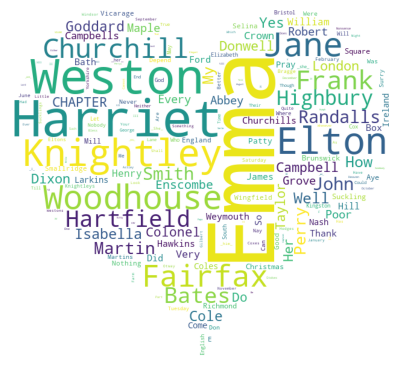

In [56]:
# random_state=0 : 글자가 나타나는 위치를 고정적으로 정하기 위해 필요한 옵션
wc = WordCloud(width=1000, height=800, background_color='white', random_state=0, mask=mask_arr)
plt.imshow(wc.generate_from_frequencies(fd_name))
plt.axis('off') # 축지정 해제
plt.savefig('data/wc.png')
plt.show()

In [ ]:
str1 = '''Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly es'''